In [12]:
import pandas as pd 
import numpy as np
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import tensorflow as tf

csvfile = "Data_training_1.csv"  #file name 
#csvfile = "Data_actor2000.pt.csv"  #file name 

In [13]:
data_test= pd.read_csv(csvfile)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance
0,0,37.00,0.7,0.3,-72.60,41.63
1,1,41.51,0.7,0.3,-24.27,23.54
2,2,32.80,0.7,0.3,-119.53,51.99
3,3,25.57,0.7,0.3,-211.80,70.13
4,4,44.16,0.7,0.3,-12.36,15.36


In [3]:
profile = ProfileReport(data_test, minimal=True)
profile.to_file(output_file="output.html")

In [14]:
failed = data_test[data_test['Stop_Distance'] <= 5]
passed = data_test[data_test['Stop_Distance'] >5]

print('Size of crashes :',failed.shape[0])  
print('Size of success :',passed.shape[0]) 
print("Percentage of crash cases:{:.2f}".format(failed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")
print("Percentage of not crashed cases:{:.2f}".format(passed.shape[0]*100/(failed.shape[0]+passed.shape[0])),"%")

#failed.to_csv("crashed.csv",index=False)
#failed.head()

Size of crashes : 8764
Size of success : 11237
Percentage of crash cases:43.82 %
Percentage of not crashed cases:56.18 %


In [15]:
#passed.to_csv("not_crashed.csv",index=False  )
#passed.head()

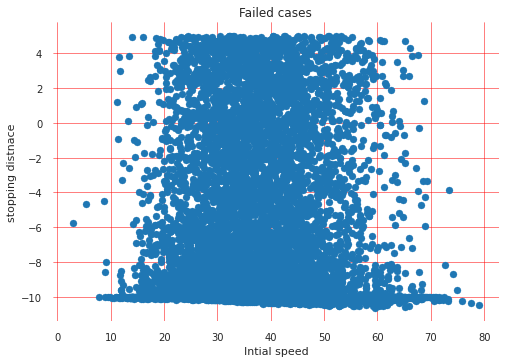

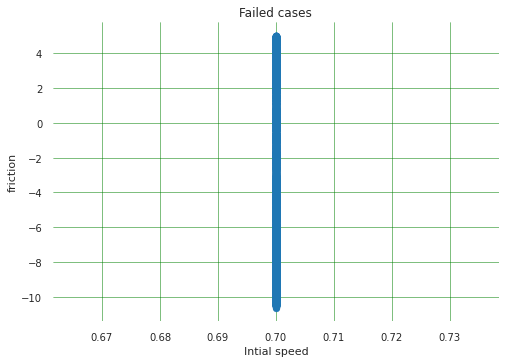

In [6]:
fig=plt.figure
plt.scatter(failed["Kick_Speed"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("stopping distnace")
plt.show()

fig=plt.figure
plt.scatter(failed["friction"],failed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("Intial speed")
plt.ylabel("friction")
plt.show()


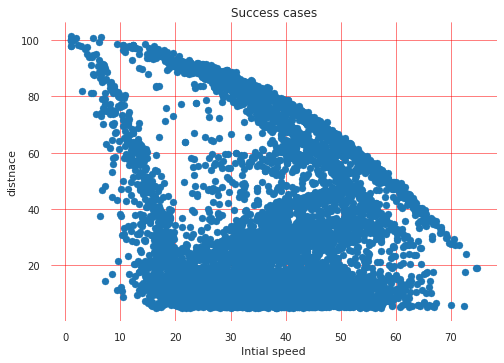

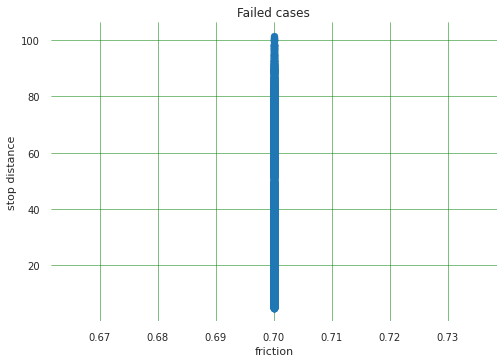

In [7]:
fig=plt.figure
plt.scatter(passed["Kick_Speed"],passed["Stop_Distance"])
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title("Success cases")
plt.xlabel("Intial speed")
plt.ylabel("distnace")
plt.show()

fig=plt.figure
plt.scatter(passed["friction"],passed["Stop_Distance"],label='Line 2')
plt.grid(color='g', linestyle='-', linewidth=0.5)
plt.title("Failed cases")
plt.xlabel("friction")
plt.ylabel("stop distance")
plt.show()

In [8]:
data_test.loc[data_test['Stop_Distance'] <= 5, 'test'] = int(1)
data_test.loc[data_test['Stop_Distance'] > 5, 'test'] = int(0)
data_test.head()

,Episode,Kick_Speed,friction,variance_friction,Rewards,Stop_Distance,test
0,0,49.30,0.7,0.3,-1013.11,-1.87,1.0
1,1,51.12,0.7,0.3,-1021.57,-10.09,1.0
2,2,50.11,0.7,0.3,-1031.30,-10.08,1.0
3,3,38.55,0.7,0.3,-1020.57,-10.02,1.0
4,4,35.49,0.7,0.3,-1022.12,-10.15,1.0


Total number of episodes: 20000
Number of Pass: 7555
Number of fail: 12444


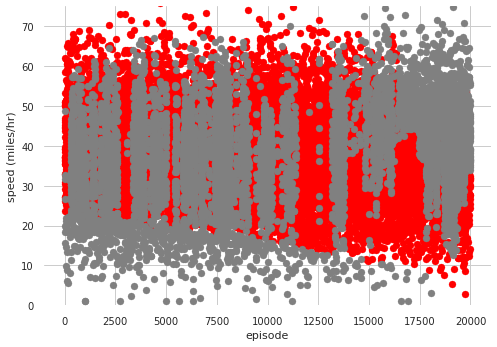

In [9]:
print('Total number of episodes:',data_test['Episode'].shape[0])
start=1
end=20000

fig, ax = plt.subplots()
episode=np.array(data_test['Episode'].values.tolist()[start:end])
test=np.array(data_test['test'].values.tolist()[start:end])
speed=np.array(data_test['Kick_Speed'].values.tolist()[start:end])

indices = test == 0
print('Number of Pass:',indices.sum())
print('Number of fail:',indices.shape[0]-indices.sum())

# normal values
ax.scatter(episode[~indices], speed[~indices], c = 'red',label='fail')
# bad values
ax.scatter(episode[indices], speed[indices], c = 'grey',label='Pass')
#ax.legend()
ax.set_ylim([0,75])
plt.xlabel('episode')
plt.ylabel('speed (miles/hr)')
ax.grid(True) 
plt.show()

Failures:  [11, 23, 29, 22, 27, 20, 18, 23, 27, 26, 26, 24, 24, 27, 25, 30, 25, 26, 28, 23, 26, 33, 22, 30, 26, 24, 29, 36, 29, 41, 32, 33, 36, 31, 25, 36, 35, 18, 30, 34, 38, 25, 30, 43, 31, 26, 35, 37, 33, 43, 40, 40, 43, 36, 39, 39, 34, 34, 44, 41, 45, 40, 48, 42, 48, 43, 43, 47, 50, 42, 51, 47, 39, 45, 58, 39, 45, 43, 49, 50, 49, 56, 47, 54, 51, 54, 57, 53, 56, 63, 56, 56, 59, 61, 60, 59, 52, 50, 61, 65, 65, 73, 52, 70, 60, 75, 61, 66, 67, 17, 3, 0, 0, 47, 31, 74, 68, 69, 74, 73, 73, 71, 56, 72, 77, 18, 73, 75, 83, 74, 64, 80, 74, 80, 75, 85, 81, 82, 85, 88, 78, 79, 87, 82, 9, 0, 60, 40, 6, 12, 66, 0, 0, 0, 20, 88, 92, 90, 90, 74, 88, 95, 90, 78, 87, 80, 75, 62, 24, 39, 59, 50, 60, 47, 7, 2, 12, 23, 27, 9, 11, 13, 15, 13, 10, 18, 2, 6, 22, 53, 50, 59, 24, 14, 17, 10, 20, 21, 20, 14]


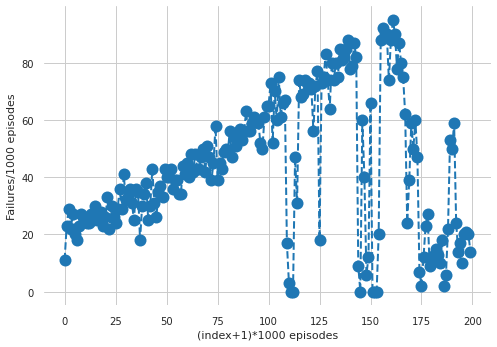

In [12]:
step=100
range_f=end/step
failure=[]
fig, ax = plt.subplots()
for i in range(int(range_f)):
    start=step*i
    episode=np.array(data_test['Episode'].values.tolist()[start:start+step])
    test=np.array(data_test['test'].values.tolist()[start:start+step])
    indices = test == 1
    failure.append(indices.sum())
print('Failures: ',failure)
ax.plot(failure,marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.xlabel('(index+1)*1000 episodes')
plt.ylabel('Failures/1000 episodes')
ax.grid(True) 
plt.show()   

In [21]:
#data for AVF training:
iteration_start=19500
iteration_end=20000
data=data_test[["Episode", "Kick_Speed","test"]][iteration_start:iteration_end]
std=np.std(data[["Episode", "Kick_Speed"]].values,axis=0)
mean=np.mean(data[["Episode", "Kick_Speed"]].values,axis=0)
np.savez('stdmean.npz',std=std, mean=mean)
data[["Episode", "Kick_Speed"]]=np.divide(np.subtract(data[["Episode", "Kick_Speed"]],mean),std)
print('std is:',std)
print('Mean is:',mean)
data.head()

std is: [144.33727862  11.20165652]
Mean is: [19749.5        37.58724]


,Episode,Kick_Speed,test
19500,-1.728590,-0.542530,0.0
19501,-1.721662,0.616227,0.0
19502,-1.714734,0.408222,0.0
19503,-1.707806,-1.017460,1.0
19504,-1.700877,1.069731,0.0


In [22]:
#AVF Training 


X=data[["Episode","Kick_Speed"]].values
print(X.shape)
Y=data["test"]
print(Y.shape)
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

#test train split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X[1,:].shape)

#callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.997):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

# Model

model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(2,)), 
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(32, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid )
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=500, batch_size=8, callbacks=[callbacks]) ;


(500, 2)
(500,)
(2,)
Epoch 1/500
42/42 [==============================] - 0s 2ms/step - loss: 0.6072 - accuracy: 0.7910
Epoch 2/500
42/42 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.9075
Epoch 3/500
42/42 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9343
Epoch 4/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1872 - accuracy: 0.9403
Epoch 5/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1635 - accuracy: 0.9403
Epoch 6/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9582
Epoch 7/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9463
Epoch 8/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1417 - accuracy: 0.9642
Epoch 9/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1378 - accuracy: 0.9612
Epoch 10/500
42/42 [==============================] - 0s 2ms/step - loss: 0.1382 - accur

42/42 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9612
Epoch 164/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9642
Epoch 165/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9672
Epoch 166/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0797 - accuracy: 0.9642
Epoch 167/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9672
Epoch 168/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9642
Epoch 169/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9672
Epoch 170/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9642
Epoch 171/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0826 - accuracy: 0.9642
Epoch 172/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9582
Epoc

42/42 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9672
Epoch 326/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9672
Epoch 327/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9731
Epoch 328/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9731
Epoch 329/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9701
Epoch 330/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9701
Epoch 331/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9761
Epoch 332/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9701
Epoch 333/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9672
Epoch 334/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0591 - accuracy: 0.9701
Epoc

42/42 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9761
Epoch 488/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0558 - accuracy: 0.9761
Epoch 489/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9761
Epoch 490/500
42/42 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 0.9761
Epoch 491/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9761
Epoch 492/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9701
Epoch 493/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0526 - accuracy: 0.9761
Epoch 494/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0556 - accuracy: 0.9761
Epoch 495/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9791
Epoch 496/500
42/42 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9791
Epoc

In [23]:
results = model.evaluate(x_test, y_test, batch_size=16)
print('test loss, test acc:', results)

11/11 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.9394
test loss, test acc: [0.6010949611663818, 0.939393937587738]


In [24]:
!mkdir -p saved_model
model.save('saved_model/my_model') 

INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [25]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

my_model
assets	saved_model.pb	variables


In [26]:
new_model = tf.keras.models.load_model('saved_model/my_model')

(5000, 2)
Data : [[20000.            44.08775507]
 [20000.            25.65029748]
 [20000.            37.12853279]
 ...
 [20000.            41.89984214]
 [20000.            53.66303649]
 [20000.            27.87846354]]


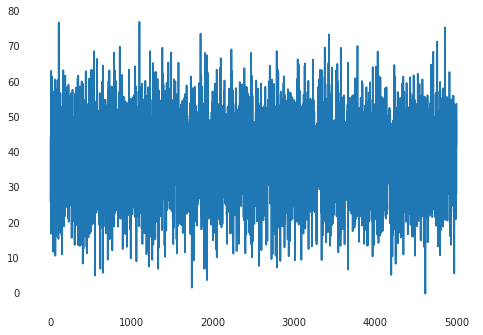

In [27]:
samples_per_iteration=5000
random_seed=np.random.randint(1,10000)
np.random.seed(random_seed)
candidate_initial_speed=[]
for i in range(samples_per_iteration): 
    #candidate_initial_speed =(9* np.random.randn(samples_per_iteration, 1) + 38).reshape(-1,1)
    candidate_initial_speed.append(np.random.normal(38,11))

candidate_initial_speed=np.array(candidate_initial_speed).reshape(-1,1)
Episode=20000*np.ones((samples_per_iteration,1)).reshape(-1,1)

data=np.concatenate((Episode,candidate_initial_speed),axis=1)
print(data.shape)
print('Data :',data)

container = np.load('stdmean.npz')
data_normalised=np.divide(np.subtract(data,container['mean']),container['std'])
plt.plot(candidate_initial_speed)

In [28]:
predicted_y=new_model.predict(data_normalised,batch_size=8)
max_value=np.amax(predicted_y)
print(max_value)
print(predicted_y.shape)
array_position=np.where(predicted_y==max_value)[0]
print(array_position)
#print(predicted_y)
#print(np.sort(predicted_y, axis=None) )
data_final=np.concatenate((data[array_position,:],predicted_y[array_position,:]),axis=1)
print(data_final)

1.0
(5000, 1)
[   5   21   30   33   58   60   96   98  111  129  135  141  153  166
  259  296  326  338  342  361  367  372  396  397  399  405  407  419
  442  445  448  464  465  466  487  493  511  532  546  594  612  615
  643  652  680  704  712  716  731  756  760  783  831  888  903  910
  916  921  939  976  987 1053 1057 1086 1121 1131 1158 1171 1181 1182
 1189 1202 1210 1238 1244 1247 1252 1254 1265 1289 1325 1330 1370 1403
 1408 1411 1424 1511 1519 1551 1557 1564 1569 1570 1594 1612 1628 1655
 1722 1739 1764 1800 1858 1879 1891 1898 1904 1907 1925 1978 2000 2011
 2034 2036 2039 2041 2047 2090 2105 2117 2173 2210 2218 2251 2291 2312
 2321 2399 2410 2448 2460 2473 2481 2490 2509 2569 2578 2597 2656 2669
 2670 2721 2734 2744 2768 2772 2774 2788 2793 2809 2830 2855 2881 2889
 2920 2933 2934 2946 3009 3056 3086 3089 3091 3114 3122 3137 3176 3177
 3218 3274 3276 3277 3338 3353 3393 3413 3440 3449 3468 3474 3544 3567
 3569 3571 3598 3621 3664 3721 3743 3752 3799 3835 3862 3878 38

In [74]:
data_final[0][1]

74.1494809483109